##### Classify Action Feature for Domain Network Security

  ---- By Shreya Bhatnagar and Abhay Sharma

In [1]:
# IMPORTING LIBRARIES

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ACCESSING TRAINING DATA

train = pd.read_csv('train.csv')

In [3]:
# PRINTING DATA

train

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,59276,49418.0,27015.0,54748.0,NaN,78.0,78.0,0.0,1.0,29.0,1.0,0.0,allow
1,18986,58120.0,25174.0,NaN,0.0,66.0,66.0,0.0,NaN,0.0,1.0,0.0,deny
2,11131,46751.0,53.0,46751.0,53.0,220.0,90.0,130.0,2.0,30.0,NaN,1.0,allow
3,57352,52596.0,NaN,0.0,0.0,66.0,66.0,0.0,1.0,NaN,1.0,0.0,drop
4,17229,50584.0,6881.0,29773.0,NaN,502.0,150.0,352.0,2.0,1200.0,NaN,1.0,allow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36322,NaN,53.0,NaN,53.0,94.0,94.0,0.0,NaN,29.0,NaN,NaN,allow
45866,36418,NaN,53.0,44635.0,53.0,177.0,94.0,83.0,2.0,NaN,NaN,1.0,allow
45867,2289,50438.0,445.0,0.0,0.0,70.0,NaN,0.0,1.0,0.0,1.0,0.0,drop
45868,10229,37785.0,80.0,22917.0,80.0,2293.0,1576.0,NaN,12.0,15.0,6.0,NaN,allow


In [4]:
# PRINTING SHAPE

train.shape

(45870, 13)

In [5]:
# PRINTING COLUMN NAMES

train.columns


Index(['ID', 'Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [6]:
train.Action.unique()

array(['allow', 'deny', 'drop', 'reset-both'], dtype=object)

In [7]:
# EDITING TARGET VARIABLE

train.Action.replace(('allow', 'deny', 'drop', 'reset-both'), (4,3,2,1), inplace=True)


In [8]:
# TRAIN TEST SPLIT
train_X_variables = ['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)']
train_y_variables = ['Action']
X_train,X_test,y_train,y_test = train_test_split(train[train_X_variables], train[train_y_variables], test_size=0.33, random_state=1)

In [9]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
15299      52712.0             443.0          61572.0                   NaN   
3644       64626.0           50584.0              0.0                   0.0   
33110          NaN              53.0          36561.0                   NaN   
11195      51844.0               NaN           8982.0               12471.0   
21327          NaN              53.0              NaN                  53.0   
...            ...               ...              ...                   ...   
43723      55678.0           52879.0          10322.0               52879.0   
32511      50792.0             445.0              0.0                   0.0   
5192        6126.0           25174.0              NaN                   0.0   
12172       1027.0           25174.0              0.0                   0.0   
33003      44511.0              53.0          15897.0                  53.0   

       Bytes  Bytes Sent  Elapsed Time (sec)  
1529

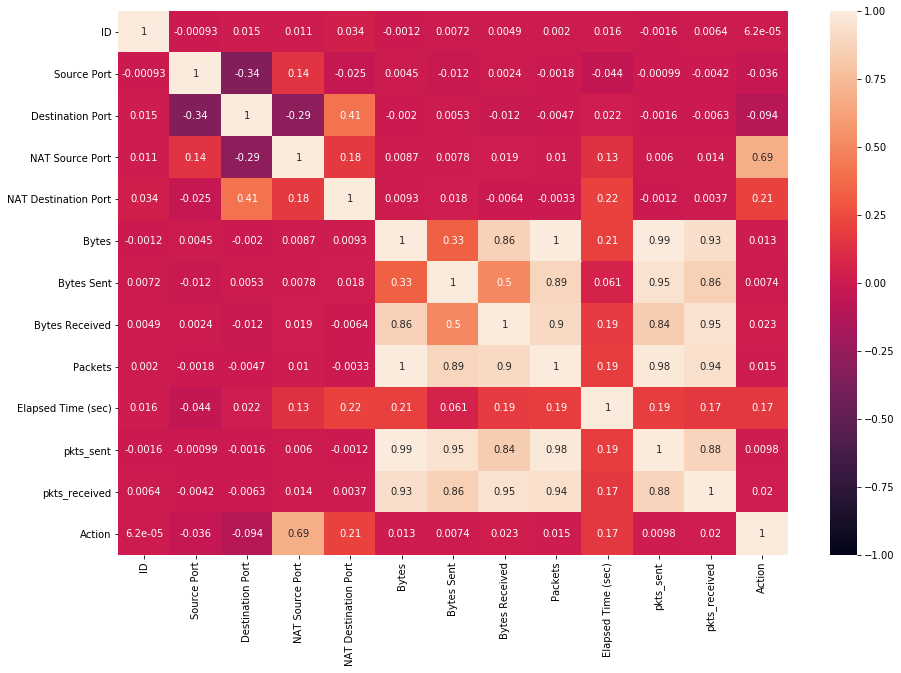

In [10]:
# Heat Map

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),vmin=-1, vmax=1, annot=True)
plt.show()

###### Cleaning Data

<I><u>Getting Catagorical and Numerical Columns to impute</u></I>

In [11]:
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# fit model to training data
cat_model = CatBoostClassifier(custom_loss=['Accuracy'],random_seed=42,loss_function = 'MultiClass', logging_level = 'Silent')
cat_model.fit(X_train, y_train)

print(X_train.columns)
print("Feature Importances : ", cat_model.feature_importances_)

# plot feature importance
#plot_importance(xgb_model)
#plt.show()

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)'],
      dtype='object')
Feature Importances :  [ 9.3328561  29.01936062  9.03910869  8.36616942 13.9811358  13.66963724
 16.59173213]


In [12]:
# Getting Catagorical Columns

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# Getting Numerical Columns

s = (X_train.dtypes != 'object')
num_cols = list(s[s].index)

#printing to check

print(object_cols)
print(num_cols)

[]
['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)']


In [13]:
# Numeric Transformer

numerical_transformer = SimpleImputer(strategy='median')

# Catagorical Transformer

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, object_cols)
    ])


In [14]:
#!pip install catboost
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(custom_loss=['Accuracy'],random_seed=42,loss_function = 'MultiClass', logging_level = 'Silent')


In [15]:
# APPLYING PIPELINE

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_cat)
                             ])
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_test)
preds_training = my_pipeline.predict(X_train)

#print(preds)
#print(sum(preds))
#print(len(preds) - sum(preds))
#print((sum(preds))/(len(preds) - sum(preds)))

In [16]:
print(f1_score(y_test,preds,average = 'macro'))
print(f1_score(y_train,preds_training, average = 'macro'))

0.7916574972168509
0.8426135022615272


In [17]:
preds = pd.DataFrame(preds)

In [18]:
preds.columns = ['Action']
print(preds)


       Action
0           4
1           4
2           4
3           4
4           3
...       ...
15133       2
15134       2
15135       3
15136       4
15137       4

[15138 rows x 1 columns]


In [19]:
preds.Action.value_counts()

4    8692
3    3229
2    3215
1       2
Name: Action, dtype: int64

In [20]:
# IMPORTING PREDICTION DATA

test = pd.read_csv('test.csv')



In [21]:
test

,ID,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,23127,50142.0,445.0,0.0,0.0,NaN,70.0,0.0,1.0,0.0,1.0,NaN
1,61535,49496.0,53.0,NaN,53.0,194.0,NaN,92.0,2.0,30.0,1.0,1.0
2,31457,49209.0,53.0,27106.0,NaN,199.0,102.0,NaN,NaN,31.0,NaN,1.0
3,49294,49225.0,53.0,NaN,53.0,295.0,101.0,194.0,NaN,48.0,2.0,2.0
4,8826,NaN,NaN,0.0,NaN,70.0,70.0,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19657,1083,NaN,25174.0,0.0,0.0,146.0,146.0,0.0,NaN,NaN,1.0,NaN
19658,20633,NaN,53.0,49003.0,53.0,194.0,102.0,92.0,2.0,31.0,1.0,1.0
19659,50324,27005.0,27015.0,NaN,27015.0,878.0,NaN,752.0,2.0,30.0,1.0,1.0
19660,16271,49676.0,53.0,NaN,NaN,216.0,110.0,106.0,2.0,30.0,1.0,1.0


In [22]:
final_train_X = train[train_X_variables]
final_train_y = train[train_y_variables]
final_test_X = test[train_X_variables]

In [23]:
# Getting Catagorical Columns

s = (final_train_X.dtypes == 'object')
object_cols = list(s[s].index)

# Getting Numerical Columns

s = (final_train_X.dtypes != 'object')
num_cols = list(s[s].index)

#printing to check

print(object_cols)
print(num_cols)

[]
['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)']


In [24]:
# Numeric Transformer

numerical_transformer = SimpleImputer(strategy='median')

# Catagorical Transformer

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, object_cols)
    ])


In [25]:
# APPLYING PIPELINE

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_cat)
                             ])
my_pipeline.fit(final_train_X, final_train_y)
preds = my_pipeline.predict(final_test_X)



In [26]:
import pandas as pd
preds = pd.DataFrame(preds)
preds.columns = ['Action']

In [27]:
preds.Action.replace((4,3,2,1),('allow', 'deny', 'drop', 'reset-both') ,inplace=True)


In [ ]:
preds.to_csv('final_3_cat_3.csv')